In [0]:
import requests  
r = requests.get('https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html')

from bs4 import BeautifulSoup  
soup = BeautifulSoup(r.text, 'html.parser')  
results = soup.find_all('span', attrs={'class':'short-desc'})

records = []  
for result in results:  
    date = result.find('strong').text[0:-1] + ', 2017'
    lie = result.contents[1][1:-2]
    explanation = result.find('a').text[1:-1]
    url = result.find('a')['href']
    records.append((date, lie, explanation, url))

import pandas as pd  
df = pd.DataFrame(records, columns=['date', 'lie', 'explanation', 'url'])  
df['date'] = pd.to_datetime(df['date'])  
df.to_csv('trump_lies.csv', index=False, encoding='utf-8')  

In [2]:
data=pd.read_csv('trump_lies.csv')
newdata=pd.DataFrame(data)
newdata.head()


,date,lie,explanation,url
0,2017-01-21,I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
1,2017-01-21,A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...
2,2017-01-23,Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
3,2017-01-25,"Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
4,2017-01-25,Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...


In [4]:
newdata.shape

(180, 4)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



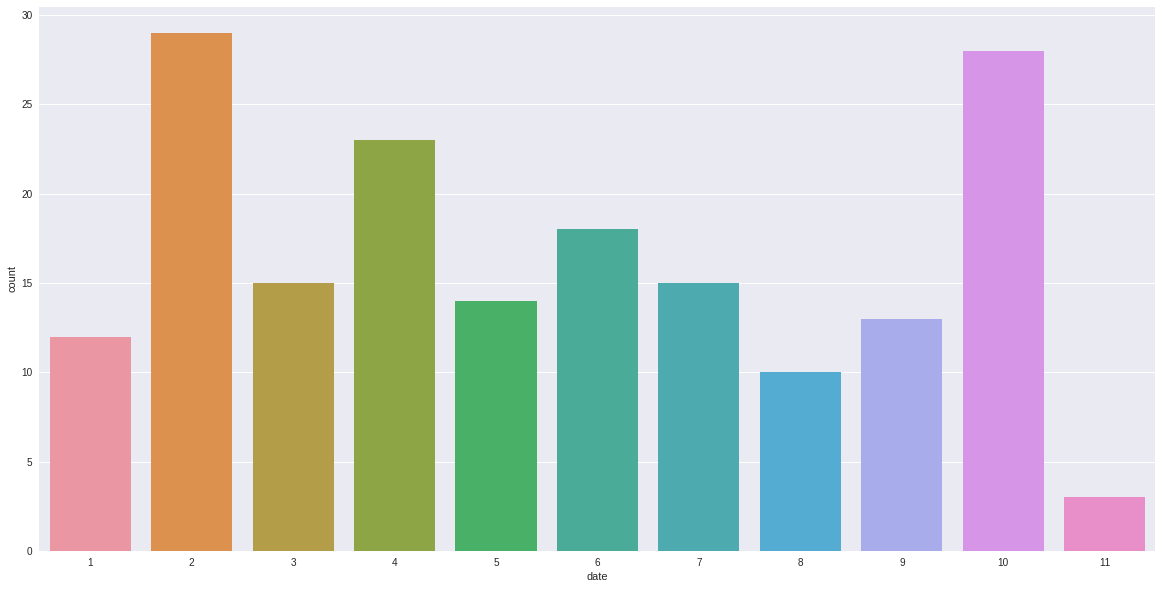

In [19]:
import matplotlib.pyplot as plt
# import plotly and offline mode
#from plotly.offline import iplot, init_notebook_mode
#import plotly.graph_objs as go
#!pip install cufflinks
#!pip install plotly
# import cufflinks and offline mode
#import cufflinks as cf
#cf.go_offline()

% matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x=pd.DatetimeIndex(newdata['date']).month,data=newdata)
plt.show()